In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

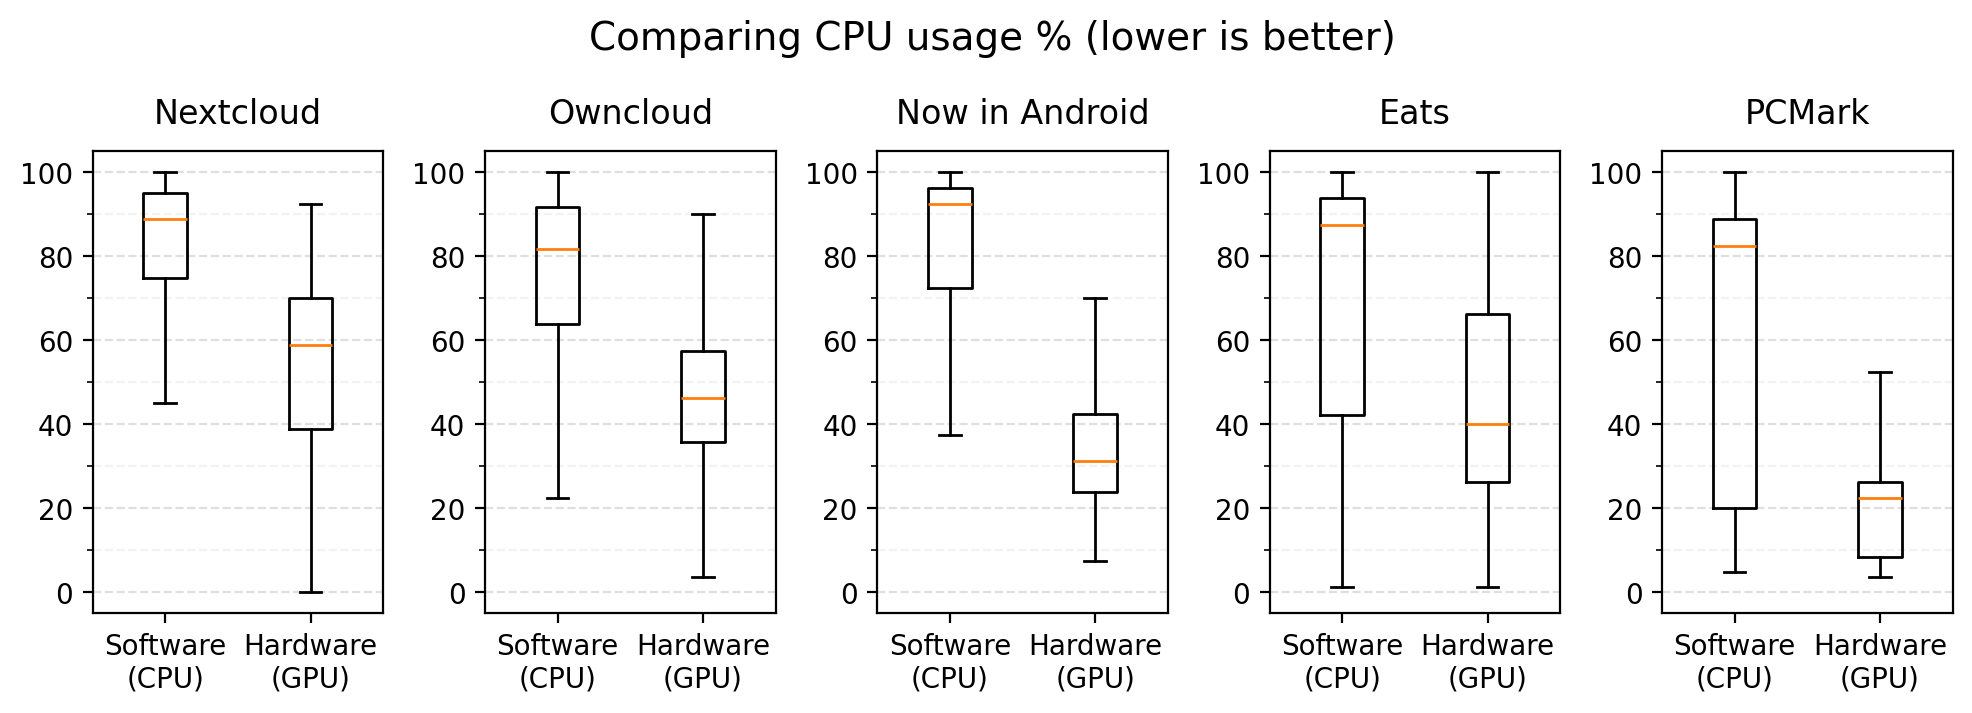

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 3), dpi=200, sharey=True)
fig.subplots_adjust(hspace=0.35, wspace=0.35)

fig.suptitle('Comparing CPU usage % (lower is better)', fontsize=14, y=1.1)

ax: plt.Axes
for ax, case in zip(axs.flatten(), ['Nextcloud', 'Owncloud', 'Now in Android', 'Eats', 'PCMark']):
    case_path = case.lower().replace(' ', '')
    df_software = pd.read_csv(f'../data/{case_path}/software/top_filtered.csv')
    df_hardware = pd.read_csv(f'../data/{case_path}/hardware/top_filtered.csv')

    ax.yaxis.grid(which='major', visible=True, linestyle='--', color='grey', alpha=0.25)
    ax.yaxis.grid(which='minor', visible=True, linestyle='--', color='grey', alpha=0.1)
    ax.yaxis.set_tick_params(which='both', labelbottom=True)

    ax.boxplot(
        x = [df_software['cpu'] / 4, df_hardware['cpu'] / 4],
        showfliers=False,
        widths=0.3,
    )
    ax.set_xticks(ticks=[1, 2], labels=['Software\n(CPU)', 'Hardware\n(GPU)'])
    ax.set_yticks(ticks=np.arange(0, 101, 20), minor=False)
    ax.set_yticks(ticks=np.arange(0, 101, 10), minor=True)
    ax.set_title(case, pad=10)

plt.show()